<h2><font color="#004D7F" size=6>Módulo 3. Preprocesamiento de datos</font></h2>



<h1><font color="#004D7F" size=5>1. Análisis Exploratorio de Datos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Análisis exploratorio paso a paso](#section2)
    * [2.1. Librerías y CSV](#section21)
    * [2.2. Información básica](#section22)
* [3. Visualización](#section3)
    * [3.1. Matriz de correlación](#section31)
    * [3.2. Cargar un segundo dataset](#section32)
    * [3.3. Comparativa entre dos países](#section33)
    * [3.4. Filtrado de datos](#section34)
    * [3.5. Detección de outliers](#section35)
    * [3.6. Mejorando la visualización](#section36)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---
<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

El Análisis Exploratorio de Datos (Eda, Exploratory Data Analysis) en una de las primeras tareas que tiene que desempeñar el Científico de Datos. Es cuando revisamos por primera vez los datos que nos llegan y deberemos intentar comprender «¿de qué se trata?», vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

A nivel programación y como venimos utilizando Python, encontramos a la conocida librería Pandas, que nos ayudará a manipular datos, leer y transformarlos. Otra de las técnicas que más nos ayudaran en el EDA es visualización de datos.

Finalmente podemos decir que nuestra Intuición y Empirismo -basada en Experiencia previa, no en corazonadas- y nuestro conocimiento de casos similares también nos pueden aportar pistas para saber si estamos ante datos de buena calidad. 

Recuerde que el análisis exploratorio es simplemente utilizar todas las herramientas que hemos visto hasta ahora pero analizar y comentar su salida que nos proporciona en nuestro conjunto de datos. Veamos un ejemplo paso a paso.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a> 
# <font color="#004D7F">2. Análisis exploratorio paso a paso</font>

Vamos a leer un csv que contiene información geográfica básica de los países del mundo y vamos a jugar un poco con esos datos. Para elo lo primero que vamos a realizar es cargar las librerías.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Librerías y CSV</font>

Como siempre cargamos el CSV que vamos a utilizar. Así mismo, vamos a cargar las librerías principales que utilizaremos en esta sección.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns 
dataset = 'data/countries.csv'
df = pd.read_csv(dataset, sep=';')
df

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,ZA,ZAF,1219912.0,Pretoria,AF,ZAR,Rand,NaN,SF,953987,"zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr",South Africa,"ZW,SZ,MZ,BW,NA,LS",710,27,49000000,####,^(\d{4})$,.za
248,ZM,ZMB,752614.0,Lusaka,AF,ZMW,Kwacha,NaN,ZA,895949,"en-ZM,bem,loz,lun,lue,ny,toi",Zambia,"ZW,TZ,MZ,CD,NA,MW,AO",894,260,13460305,#####,^(\d{5})$,.zm
249,ZW,ZWE,390580.0,Harare,AF,ZWL,Dollar,NaN,ZI,878675,"en-ZW,sn,nr,nd",Zimbabwe,"ZA,MZ,BW,ZM",716,263,13061000,NaN,NaN,.zw
250,CS,SCG,102350.0,Belgrade,EU,RSD,Dinar,NaN,YI,8505033,"cu,hu,sq,sr",Serbia and Montenegro,"AL,HU,MK,RO,HR,BA,BG",891,381,10829175,#####,^(\d{5})$,.cs


---
<a id="section22"></a>
## <font color="#004D7F"> 2.2. Información básica</font>

En este apartado vamos a conocer información básica del conjunto de datos que es muy importante de verificar antes de ponernos a realizar un tratamiento. Esta información se obtiene, básicamente, de las mismas funciones de Pandas.

Lo primero que tenemos que concer es el tamaño de nuestro dataset y los nombres de las columnas que tiene.

cantidad de filas y columnas (252, 19)
nombres de columnas Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


Un aspecto también muy importante es ver el tipo de dato que tiene cada característica (columna). Hay que tener tres aspectos esenciales en este apartado:
   * Las columnas que no tenga el tipo correcto deberemos transformarlas. Por ejemplo a veces muchas columnas están dadas como categóricas cuando sus valores son numéricos.
   * Cuando tenemos en un mismo dataset características numéricas y categóricas deberemos uniformizarlo, es decir, o todas categóricas o todas numéricas (lo veremos en más adelante).
   * Ver si alguna columna tiene valores _NaN_ que deberemos de tratar (lo veremos en más adelante).


En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos. En este caso vemos como en este dataset podemos observar que la columna `eqivalent_fips_code}` de 252 valores solamente hay 1 valor válido (todos los demás son _NaN)._ Además, también nos proporciona información sobre el tipo, es decir, si es String _(object),_ flotante (_float64)_ o Entero (_int64)._ Finalmente, podemos utilizar la función de Pandas para contar el número de _NaN_ que tiene nuestro dataset

alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

Pandas filtra las características numéricas y calcula datos estadísticos que pueden ser útiles: cantidad, media, desvío estándar, valores máximo y mínimo

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización</font>

Visualizar nuestros datos esencial para poder tener una idea de su comortamiento y distribución, para ello, y como hemos visto, tenemos dos librerías fundamentales para poder trabajarlo: __MatPlotlib__ y __Seaborn__. Veamos algunas conclusiones sobre la distribución de nuestros datos.

---
<a id="section31"></a>
## <font color="#004D7F"> 3.1. Matriz de correlación</font>

Verifiquemos si hay correlación entre los datos. En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación entre ellas (lo veremos más adelante)

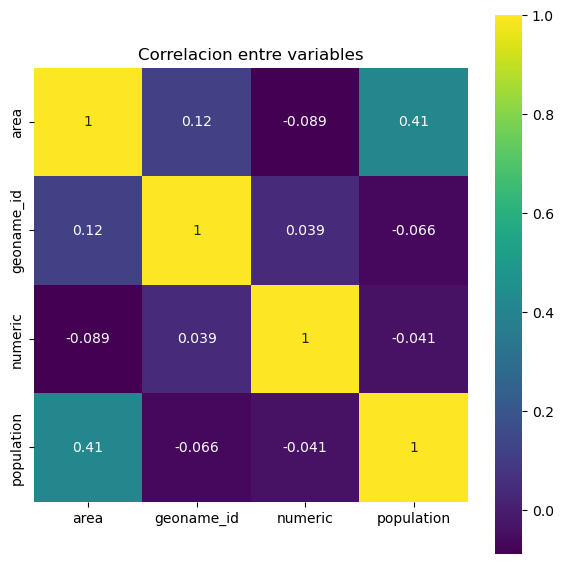

---
<a id="section32"></a>
## <font color="#004D7F"> 3.2. Cargar un segundo dataset</font>

Cargamos un segundo archivo csv para ahondar en el crecimiento de la población en los últimos años, filtramos a España y visualizamos el crecimiento de la Población de España. El eje x no está establecido y aparece un id de fila.

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


<AxesSubplot:>

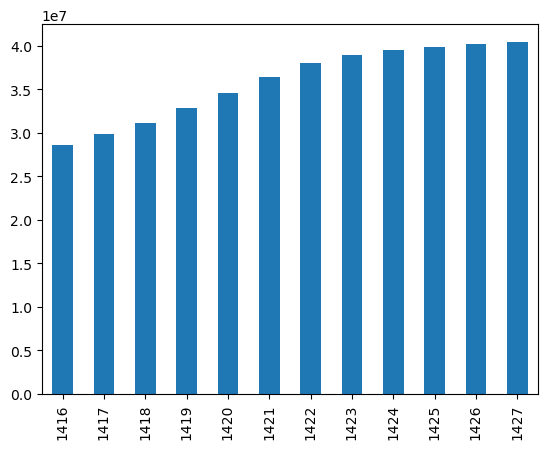

---
<a id="section33"></a>
## <font color="#004D7F"> 3.3. Comparativa entre dos países</font>

Hagamos la comparativa con otro país, por ejemplo con el crecimiento poblacional en Argentina

<AxesSubplot:>

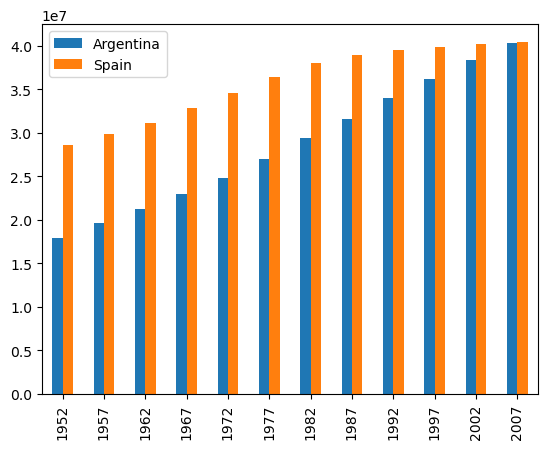

## ---
<a id="section34"></a>
## <font color="#004D7F"> 3.4. Filtrado de datos</font>

Ahora filtremos todos los paises hispano-hablantes

<AxesSubplot:xlabel='alpha_3'>

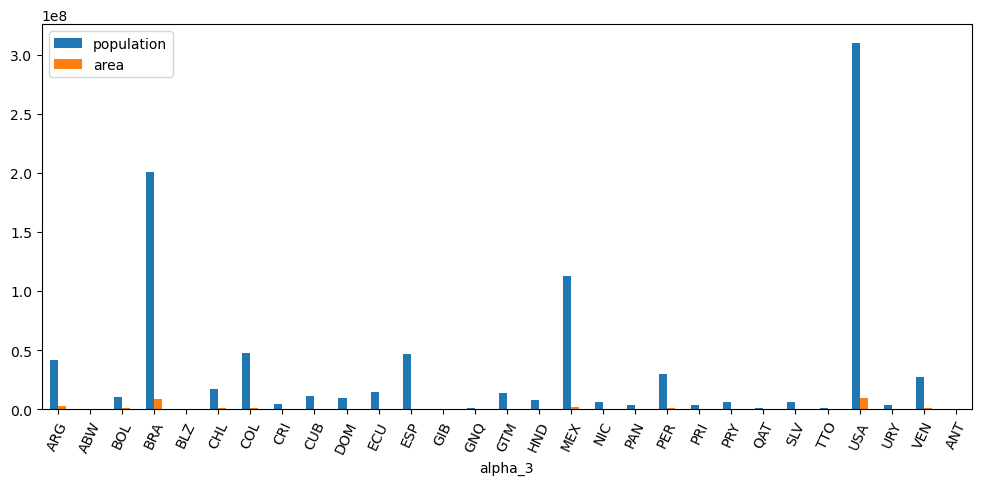

---
<a id="section35"></a>
## <font color="#004D7F"> 3.5. Detección de outliers</font>

Vamos a hacer detección de Outliers, (con fines educativos) en este caso definimos como limite superior (e inferior) la media más (menos) "2 veces la desviación estándar" que muchas veces es tomada como máximos de tolerancia. Detectamos como outliers a Brasil y a USA. Los eliminamos y graficamos ordenado por población de menor a mayor.

-102872707.87855022
167589161.25786057


['BRA', 'USA']

<AxesSubplot:xlabel='alpha_3'>

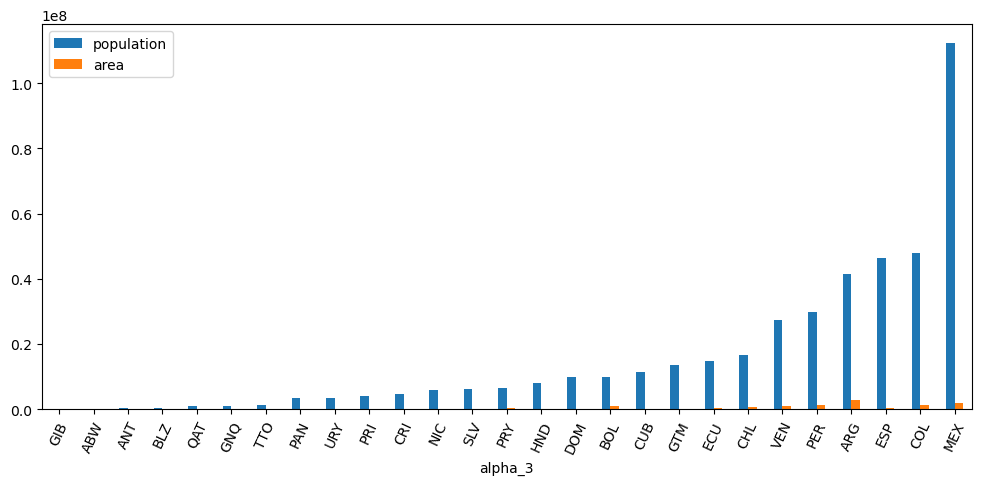

---
<a id="section36"></a>
## <font color="#004D7F"> 3.6. Mejorando la visualización</font>

Como podemos observar la gráfica no se ve bien ya que tenemos muchos valores y muy diferentes entre ellos. Para ello una buena metodología es segmentar en rangos. En este caso, podríamos quitar por "lo bajo", area menor a 110.000$km^{2}$.

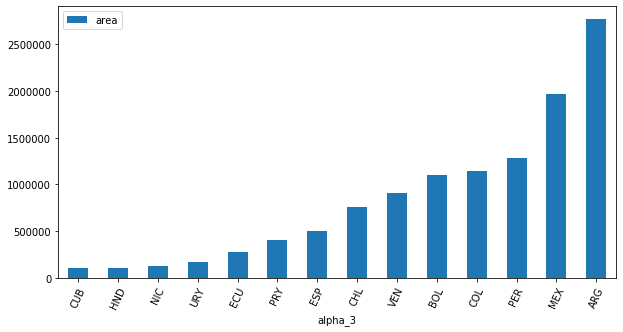

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>